# Noise cancellation 

Let's see another use case of PCA: noise reduction. In this exercise, we will need to classify handwritten digits. Unfortunately, the dataset is extremely noisy. Let's see how PCA can help us!

1. Import `pandas` and then download data from these two urls: 
    * images 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits.csv" target="_blank">Download</a>

    * labels 👉👉 <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/PCA/noisy_digits_labels.csv" target="_blank">Download</a>

In [2]:
import pandas as pd

In [3]:
df_pixels = pd.read_csv("../../src/noisy_digits.csv", index_col=[0])
df_labels = pd.read_csv("../../src/noisy_digits_labels.csv", index_col=[0], squeeze=True)

display(df_pixels.head())
display(df_labels.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,-176.321245,-52.743850,143.604939,-53.567749,80.289381,20.686379,-197.423519,-229.401206,-221.900009,64.194187,...,34.407070,1.950735,-25.095565,133.684095,-21.664094,-94.305438,-55.987821,-89.929231,40.394774,-214.754480
1,-158.421239,16.371695,62.810879,263.533916,-193.920320,-25.366668,107.062706,125.403427,83.536343,-55.713640,...,-5.419961,-123.584030,20.240434,-25.699206,-128.545930,52.525885,-54.214887,-133.842624,-30.141215,210.408665
2,-290.343750,81.586500,12.615232,146.567851,111.233602,-188.989259,-101.464605,-107.015195,-13.069827,-245.921093,...,-139.909318,-85.214133,167.495617,62.402411,-144.402970,152.263950,-4.687051,-59.270131,-93.193600,188.229794
3,-208.840590,136.190431,38.552191,-67.825346,24.316303,176.103673,31.581298,-163.582673,29.777077,-110.969396,...,-131.385192,40.329733,-10.111639,163.497435,41.010287,-21.408008,328.274235,-15.341672,121.570863,151.757537
4,-328.876288,-42.862900,174.651874,-228.833439,71.909654,-97.206392,48.048853,-34.071313,3.820465,137.807730,...,-135.713199,-71.396796,155.237981,-141.860908,155.657335,166.609760,-52.911774,267.150703,-36.749672,131.913772


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

2. Remove first columns of labels and images 

3. Visualize images by using `numpy` and `matplotlib`
>  *    You can use `.reshape()` of `numpy` 👉 images are 28x28 pixels 😉
>  *   You can also use `.imshow` from `matplotlib to visualize images 

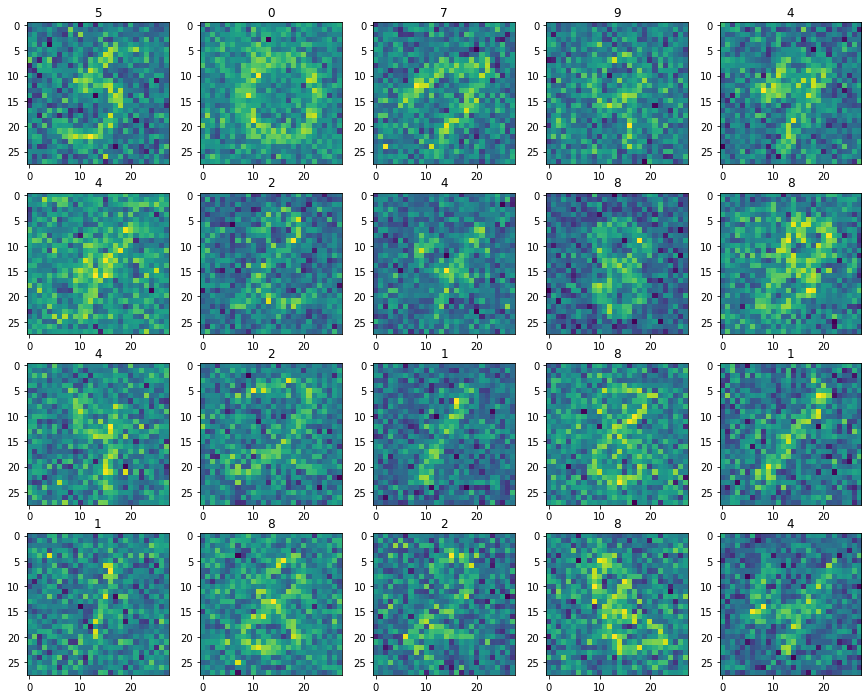

In [39]:
from matplotlib import pyplot as plt

def plot_numbers(df, target, num_sample = 20, num_cols = 5):
    
    datas, pixels = df.shape
    
    rand_samp = df.sample(n=num_sample, random_state=1)
    
    rand_sample= pd.DataFrame({"images": rand_samp.apply(lambda x: x.values.reshape(int(pixels**0.5), int(pixels**0.5)), axis=1).sort_index(), 
                               "target": target[target.index.isin(rand_samp.index)]})
    
    num_lines = int(num_sample / num_cols) + int(num_sample%num_cols != 0)
    
    f, axes = plt.subplots(num_lines, num_cols,figsize=(15,3*num_lines))

    for idx, ax in enumerate(axes.flat):
        row = rand_sample.iloc[idx, :]
        ax.imshow(row["images"])
        ax.set_title(row["target"])

    plt.show()
    
plot_numbers(df_pixels, df_labels)

4. Use `train_test_split` from `sklearn` to split your dataset into a train and a test set.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pixels, df_labels, test_size=0.3, random_state=0)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26437,-98.625791,-64.734390,-164.305541,-46.789179,-148.343126,-243.805093,12.273438,-222.451152,-197.968335,1.912605,...,-6.694884,21.642537,-136.400294,-243.348717,-65.577653,116.414449,264.450279,53.561122,162.742696,43.060332
22987,93.500762,-40.150080,123.586780,-173.618805,-18.673364,42.836707,50.993075,33.294277,13.464667,113.080166,...,-193.963780,126.419721,-17.030660,-38.183177,-51.445618,160.470723,215.980940,-159.463985,109.267655,-7.374575
25862,55.732222,43.029598,92.947482,10.478898,-51.396414,81.635608,24.915718,-136.298781,183.719586,131.278906,...,-221.222636,-164.560103,-48.564330,-48.301372,155.843940,-159.796076,-36.009534,72.329863,61.989135,-55.631201
642,-152.221362,-61.386272,81.632514,-30.187833,-148.720953,-73.693752,-257.506604,-89.460287,-113.008610,307.710259,...,20.701878,-97.515698,-80.950624,-186.956415,139.495270,-68.293733,-135.727057,-235.313176,-142.142416,12.953900
41632,45.515526,-86.365757,-124.244351,-164.058682,-357.834249,100.565817,236.670571,-59.007826,-161.174665,38.302916,...,-160.063049,-340.039854,-112.890176,-128.980952,53.828770,-224.316791,19.956188,-32.205183,-116.667588,-210.072549


5. Normalize your train set and apply your normalization on your test set. 

In [6]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_norm_train = std.fit_transform(X_train)
X_norm_test = std.transform(X_test)

6. Import `SVC` from `sklearn.svm` and apply it on your dataset. Check out scores. 

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0, verbose=True)
svc.fit(X_norm_train, y_train)
svc.score(X_norm_test, y_test)

[LibSVM]

7. Import `PCA` from `sklearn.decomposition` and apply it on your train set. 
> Keep only 15% of the explained variance 

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.15)
X_pca_train = pca.fit_transform(X_norm_train)
X_pca_train

array([[ 8.16308915, -0.29004472,  0.8472478 , ..., -0.43384306,
         0.07860894,  1.53192595],
       [-5.41441556, -3.77536136, -1.59816738, ...,  0.35813117,
         0.38833518,  1.79759145],
       [ 0.93271751,  3.73776076, -0.70187022, ..., -0.09721307,
        -0.69702526, -0.02802317],
       ...,
       [-2.35512723,  5.30775776,  3.55627818, ...,  0.52522788,
        -0.81613209, -2.5411357 ],
       [ 9.09637133, -2.30609954, -3.19207162, ...,  2.16950759,
         1.38065266,  1.39465335],
       [-2.17606989,  3.56824863,  0.6444142 , ..., -1.62108342,
        -0.4711969 ,  0.31501003]])

8. Get the number of components 

In [8]:
pca.n_components_

31

9. Apply PCA on your test set

In [10]:
X_pca_test = pca.transform(X_norm_test)
X_pca_test

array([[ 2.66300941, -0.5898089 ,  7.90658425, ..., -0.98754175,
        -0.54134413, -0.25584515],
       [-1.55625556,  3.47017844, -1.68865184, ...,  1.02536629,
         0.22443996,  3.11431796],
       [-3.0582642 ,  5.18283745, -2.13125007, ...,  0.25682449,
         1.77797742,  1.41400871],
       ...,
       [-5.8488151 , -1.68343498,  1.25937009, ...,  1.1209539 ,
         0.79958093,  0.0128793 ],
       [-1.58259394,  0.33145451, -1.46995414, ..., -0.28826882,
         0.70602965, -2.19511978],
       [ 0.36302125, -0.20751821, -4.71113612, ...,  0.94977429,
        -2.44779456, -0.76098378]])

10. Visualize your new images after applying PCA
> NB: You will need to apply `.inverse_transform()` method on your PCA

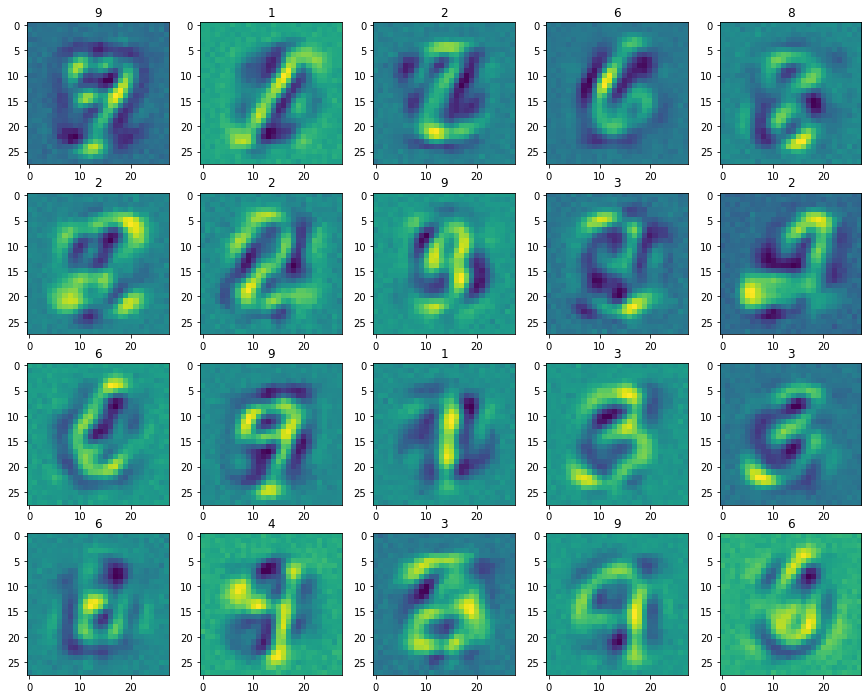

In [40]:
plot_numbers(pd.DataFrame(pca.inverse_transform(X_pca_test)), y_test.reset_index(drop=True))

11. Train a new SVM on your data after applying PCA. 

In [25]:
from sklearn.svm import SVC

svc = SVC(random_state=0, verbose=True)
svc.fit(X_pca_train, y_train)
svc.score(X_pca_test, y_test)

[LibSVM]

0.9424603174603174

In [ ]:
### Not only we improve accuracy but training took wayyy less time! 